# 1. Prediction Task
## 1.1 Read and Explore the Data

First, load the data and packages.

In [1]:
#load packages
library(psych)
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)

#load data
train <- read.delim("ticdata2000.txt", header=FALSE)
predict <- read.delim("ticeval2000.txt", header=FALSE)
target <- read.delim("tictgts2000.txt", header=FALSE)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



Inspect the data, omit the missing values if there is any.

In [2]:
# if there are missing values
train = na.omit(train)
predict = na.omit(predict)
target = na.omit(target)

In [3]:
#find dimensions of the data sets
dim(train)
dim(predict)
dim(target)

[1] 5822   86

[1] 4000   85

[1] 4000    1

In [4]:
head(train)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
33,1,3,2,8,0,5,1,3,7,⋯,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
#Find the descriptive statistics of variables
round(describe(train),2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1,1,5822,24.25,12.85,30,24.98,11.86,1,41,40,-0.43,-1.35,0.17
V2,2,5822,1.11,0.41,1,1.00,0.00,1,10,9,7.42,99.99,0.01
V3,3,5822,2.68,0.79,3,2.64,1.48,1,5,4,0.18,0.01,0.01
V4,4,5822,2.99,0.81,3,2.95,0.00,1,6,5,0.47,0.62,0.01
V5,5,5822,5.77,2.86,7,5.90,2.97,1,10,9,-0.33,-1.35,0.04
V6,6,5822,0.70,1.00,0,0.52,0.00,0,9,9,2.24,8.62,0.01
V7,7,5822,4.63,1.72,5,4.63,1.48,0,9,9,0.07,0.45,0.02
V8,8,5822,1.07,1.02,1,0.96,1.48,0,5,5,0.90,0.79,0.01
V9,9,5822,3.26,1.60,3,3.32,1.48,0,9,9,-0.13,-0.03,0.02
V10,10,5822,6.18,1.91,6,6.33,1.48,0,9,9,-0.72,0.68,0.03


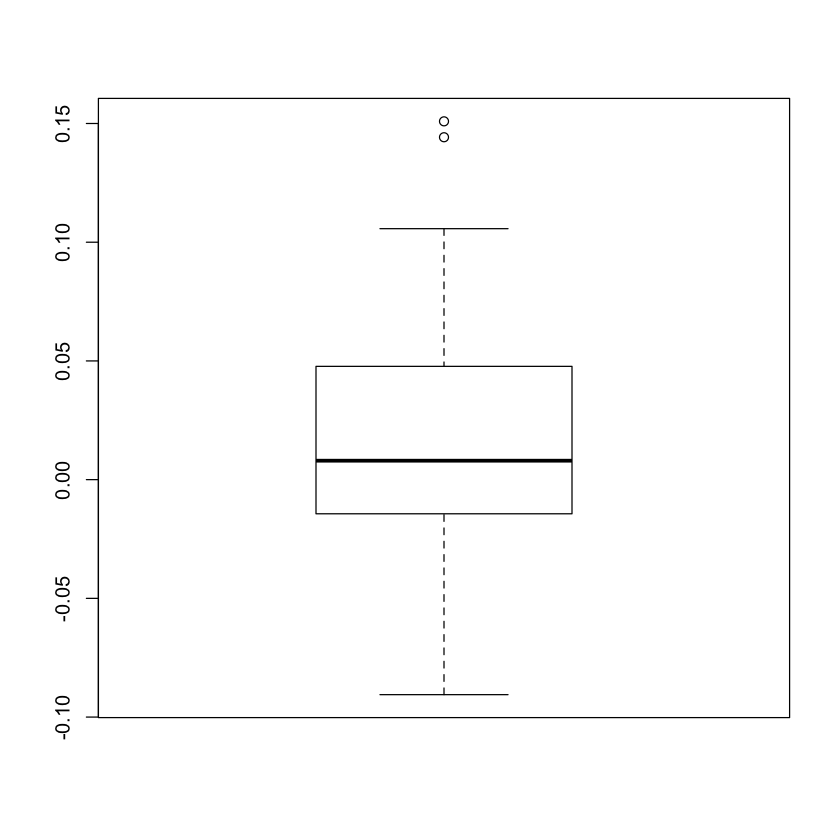

In [6]:
#plot the correlation of the target with all predictors
cor <- as.data.frame(cor(train[-86], train$V86))
boxplot(cor)

In [7]:
#filter out the variables with relatively higher correlation.
rownames(cor)[cor$V1>=0.08 | cor$V1<=-0.08]

[1] "V16" "V18" "V42" "V43" "V44" "V47" "V59" "V61" "V65" "V68" "V82"

In [8]:
#include the high correlation variables and the categorical variables
sigcor <- c("V1","V5","V16","V18","V42","V43","V44","V47","V59","V61","V65","V68","V82","V86")
sigtrain <- train[sigcor]
head(sigtrain)

V1,V5,V16,V18,V42,V43,V44,V47,V59,V61,V65,V68,V82,V86
33,8,1,7,4,3,0,6,5,0,0,1,0,0
37,8,0,4,5,4,2,0,2,0,2,0,0,0
37,8,0,4,3,4,2,6,2,0,1,1,0,0
9,3,3,2,4,4,0,6,2,0,0,1,0,0
40,10,5,0,6,3,0,0,6,0,0,0,0,0
23,5,0,4,3,3,0,6,0,0,0,1,0,0


In [9]:
cor(sigtrain[-ncol(sigtrain)])

,V1,V5,V16,V18,V42,V43,V44,V47,V59,V61,V65,V68,V82
V1,1.000000000,0.9926718736,-0.4736063385,0.525678035,-0.300341320,-0.567807080,-0.040447498,-0.0084585291,-0.0097548280,-0.0181155288,-0.0329365425,-0.008274480,-0.018161638
V5,0.992671874,1.0000000000,-0.4716200983,0.524061718,-0.282887733,-0.536337418,-0.049277660,-0.0057226078,-0.0003219675,-0.0205050911,-0.0416142581,-0.005573294,-0.020683045
V16,-0.473606339,-0.4716200983,1.0000000000,-0.638593595,0.425444776,0.398037909,0.049364606,-0.0008229176,0.0269453362,0.0078658257,0.0441490043,0.006496012,0.007604593
V18,0.525678035,0.5240617183,-0.6385935955,1.000000000,-0.417082305,-0.447878781,-0.044483581,-0.0035712701,-0.0169371135,-0.0188843584,-0.0349078666,-0.009361827,-0.019264256
V42,-0.300341320,-0.2828877334,0.4254447759,-0.417082305,1.000000000,0.452221075,0.020381246,0.0240995144,0.0796903901,0.0098893807,0.0150064781,0.027491218,0.012048674
V43,-0.567807080,-0.5363374179,0.3980379085,-0.447878781,0.452221075,1.000000000,0.012215097,0.0225545491,0.1000620468,0.0191231796,0.0032202569,0.033745754,0.019636017
V44,-0.040447498,-0.0492776598,0.0493646057,-0.044483581,0.020381246,0.012215097,1.000000000,0.1545395977,0.4848542798,0.0020784624,0.9813691759,0.143960277,-0.002178718
V47,-0.008458529,-0.0057226078,-0.0008229176,-0.003571270,0.024099514,0.022554549,0.154539598,1.0000000000,0.0914350205,0.0246132192,0.1429567158,0.916154488,0.031728496
V59,-0.009754828,-0.0003219675,0.0269453362,-0.016937114,0.079690390,0.100062047,0.484854280,0.0914350205,1.0000000000,0.0187329403,0.4860150493,0.103369037,0.013471164
V61,-0.018115529,-0.0205050911,0.0078658257,-0.018884358,0.009889381,0.019123180,0.002078462,0.0246132192,0.0187329403,1.0000000000,-0.0004150716,0.043864415,0.904436445


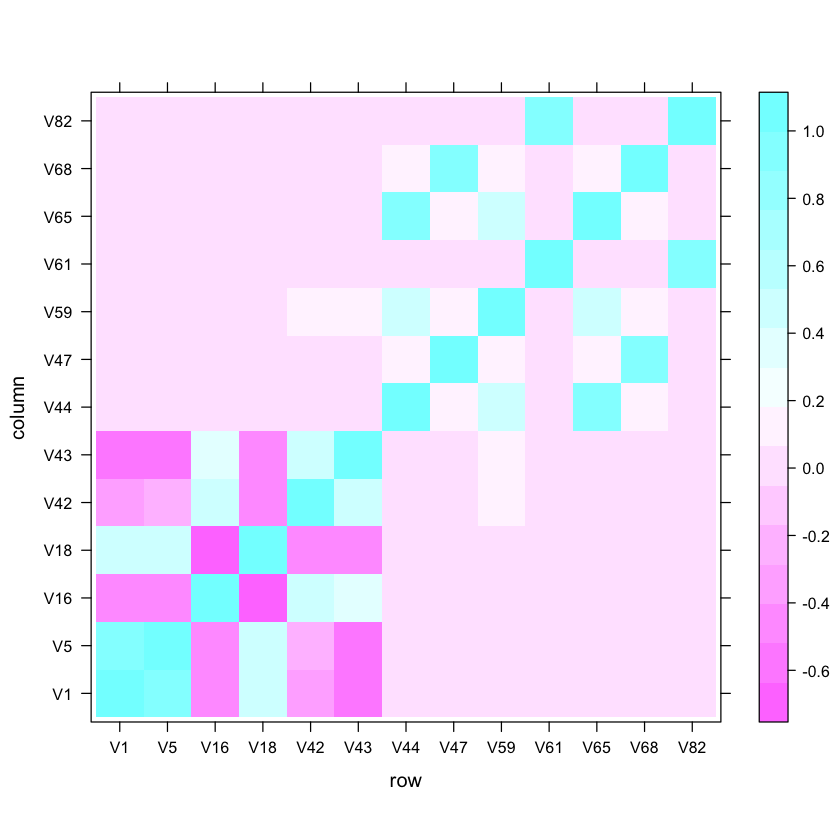

In [10]:
library(lattice)
levelplot(cor(sigtrain[-ncol(sigtrain)]))

The correlation matrix and the levelplot shows that the correlation between variables are not large, but sufficient to build model.

<b>Note that there are two categorical (nominal) variables in the dataset, V1 (customer subtype) and V5 (customer main type). </b>

In [11]:
#dataframe for V1 & V86
cust.sub <- data.frame(train$V1, train$V86)
cust.sub$train.V1 <- as.factor(cust.sub$train.V1)
cust.sub$train.V86 <- as.factor(cust.sub$train.V86)

#dataframe for V5 & V86
cust.main <- data.frame(train$V5, train$V86)
cust.main$train.V5 <- as.factor(cust.main$train.V5)
cust.main$train.V86 <- as.factor(cust.main$train.V86)

#dataframe for those who have actually purchased
policy <- train[train$V86==1,]
policy$V1 <- as.factor(policy$V1)
policy$V5 <- as.factor(policy$V5)

Plot the distribution of the caravan policy customers of their subtype.

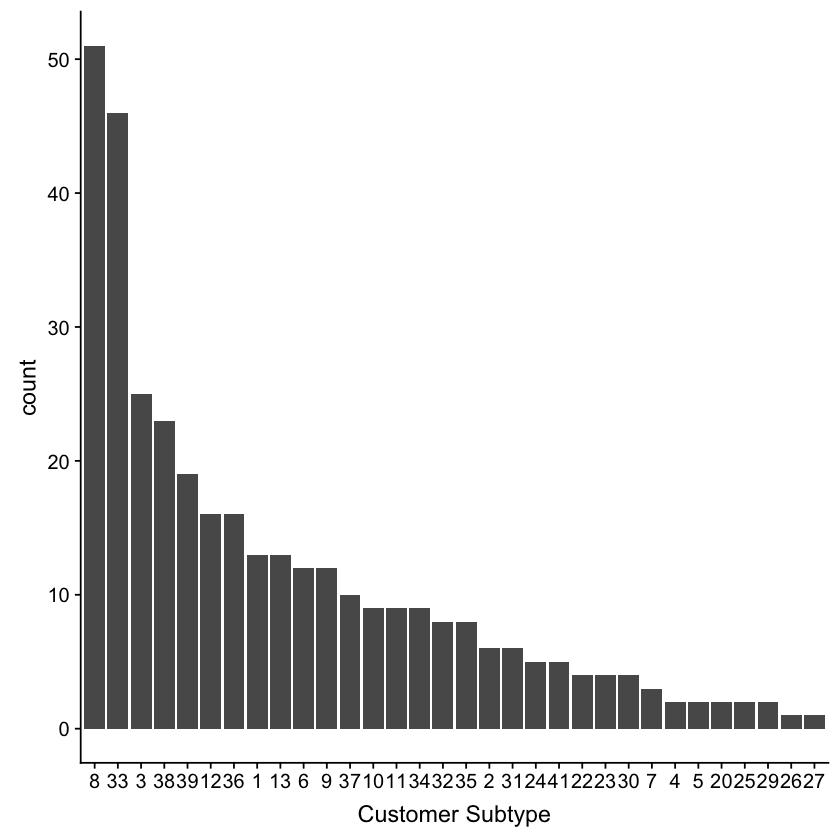

In [12]:
plot<-ggplot(policy, aes(x=reorder(V1,V1,function(x)-length(x)))) 
plot<-plot + geom_bar() 
plot<-plot + labs(x="Customer Subtype")
plot

It is not hard to tell that customer subtype 8 and 33 has a lot more policy owners than other subtypes.

Plot the distribution of the caravan policy customers of their main type.

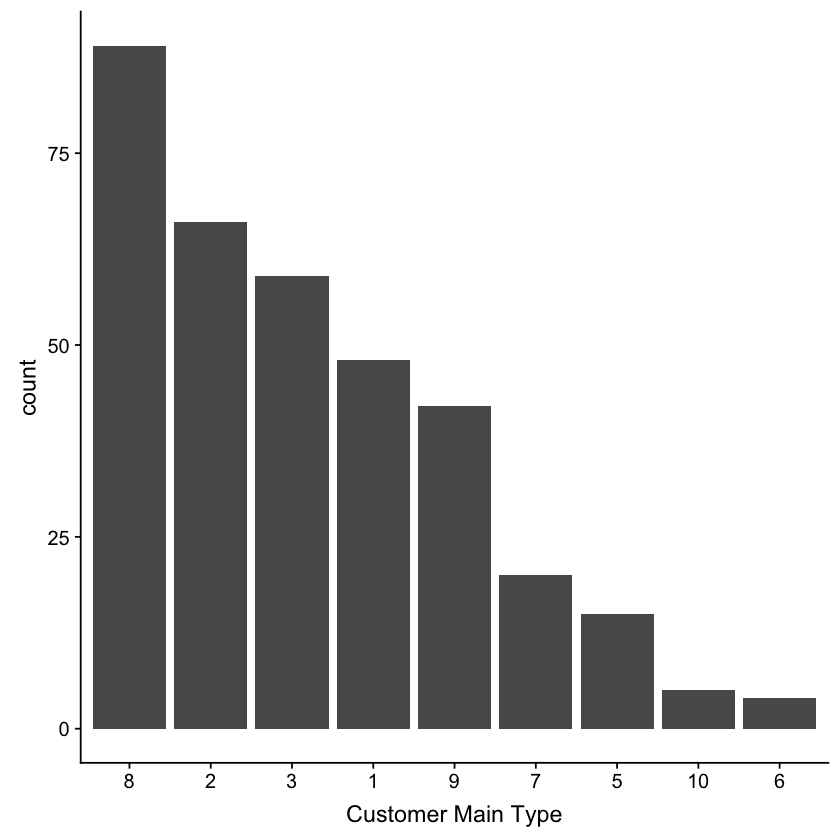

In [13]:
plot<-ggplot(policy,aes(x=reorder(V5,V5,function(x)-length(x))))
plot<-plot + geom_bar()
plot<-plot + labs(x="Customer Main Type")
plot


Customer main type 1, 2, 3, 8, 9 has a lot more policy owners than other main types.

In [14]:
library(fastDummies)
sigtrain <- dummy_cols(sigtrain, select_columns=c("V1","V5")) #create dummy variables
sigtrain <- sigtrain[, -c(1:2)] #drop V1 and V5
head(sigtrain)

V16,V18,V42,V43,V44,V47,V59,V61,V65,V68,⋯,V5_8,V5_3,V5_10,V5_5,V5_9,V5_7,V5_2,V5_1,V5_6,V5_4
1,7,4,3,0,6,5,0,0,1,⋯,1,0,0,0,0,0,0,0,0,0
0,4,5,4,2,0,2,0,2,0,⋯,1,0,0,0,0,0,0,0,0,0
0,4,3,4,2,6,2,0,1,1,⋯,1,0,0,0,0,0,0,0,0,0
3,2,4,4,0,6,2,0,0,1,⋯,0,1,0,0,0,0,0,0,0,0
5,0,6,3,0,0,6,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,4,3,3,0,6,0,0,0,1,⋯,0,0,0,1,0,0,0,0,0,0


In [15]:
dim(sigtrain)

[1] 5822   62

At this stage, the data frame has 60 columns, which is a lot, and there are a lot of dummy variables that are not significant enough to make a difference as discussed above, so they need to be dropped.

In [16]:
sigcor <- c("V1_8","V1_33","V5_1","V5_2","V5_3","V5_8","V5_9","V16","V18","V42","V43","V44","V47","V59","V61","V65","V68","V82","V86")
sigtrain <- sigtrain[sigcor]
head(sigtrain)

V1_8,V1_33,V5_1,V5_2,V5_3,V5_8,V5_9,V16,V18,V42,V43,V44,V47,V59,V61,V65,V68,V82,V86
0,1,0,0,0,1,0,1,7,4,3,0,6,5,0,0,1,0,0
0,0,0,0,0,1,0,0,4,5,4,2,0,2,0,2,0,0,0
0,0,0,0,0,1,0,0,4,3,4,2,6,2,0,1,1,0,0
0,0,0,0,1,0,0,3,2,4,4,0,6,2,0,0,1,0,0
0,0,0,0,0,0,0,5,0,6,3,0,0,6,0,0,0,0,0
0,0,0,0,0,0,0,0,4,3,3,0,6,0,0,0,1,0,0


In [17]:
dim(sigtrain)

[1] 5822   19

Create dummy variables for the "predict" dataframe for testing purposes later.

In [18]:
predict <- dummy_cols(predict, select_columns=c("V1","V5")) #create dummy variables
predict <- subset(predict, select=-c(V1,V5)) #drop V1 and V5
head(predict)

V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,⋯,V5_8,V5_2,V5_9,V5_3,V5_7,V5_1,V5_10,V5_6,V5_5,V5_4
1,4,2,0,6,0,3,5,0,4,⋯,1,0,0,0,0,0,0,0,0,0
1,3,2,0,5,0,4,5,2,2,⋯,0,1,0,0,0,0,0,0,0,0
1,3,3,1,4,2,3,5,2,3,⋯,0,0,1,0,0,0,0,0,0,0
1,2,3,2,3,2,4,5,4,1,⋯,0,0,0,1,0,0,0,0,0,0
1,2,4,0,2,0,7,9,0,0,⋯,0,0,0,0,1,0,0,0,0,0
1,2,4,1,4,2,3,5,0,4,⋯,0,0,0,0,1,0,0,0,0,0


## 1.2 Building Models
### 1.2.1 Model 1 - Multiple Logistic Regression Model
Use the full data set to perform a logistic regression with V86 as the response and V1:V85 as predictors, and use the summary function to print the results.

In [19]:
rough1 = glm(V86~., data = sigtrain, family = binomial)
summary(rough1)


Call:
glm(formula = V86 ~ ., family = binomial, data = sigtrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6715  -0.3783  -0.2600  -0.1813   3.2205  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.585556   0.343508 -13.349  < 2e-16 ***
V1_8         0.494830   0.325042   1.522 0.127919    
V1_33       -0.091652   0.239698  -0.382 0.702192    
V5_1         0.982502   0.328871   2.988 0.002813 ** 
V5_2         1.045675   0.445651   2.346 0.018956 *  
V5_3         0.844231   0.305165   2.766 0.005667 ** 
V5_8         0.871727   0.258418   3.373 0.000743 ***
V5_9         0.993412   0.261135   3.804 0.000142 ***
V16          0.044170   0.043839   1.008 0.313663    
V18         -0.088001   0.036628  -2.403 0.016280 *  
V42          0.084743   0.049448   1.714 0.086571 .  
V43         -0.059975   0.060112  -0.998 0.318411    
V44          0.710084   0.383146   1.853 0.063840 .  
V47          0.224383   0.040454   5.547 2.91e-08

<b>Conduct ANOVA Test</b>
<br>From the summary of this model, it seems like variables named V5_1, V5_2, V5_3, V5_8, V5_9, V18, V47, V59 and V82 are significant, and we can drop some of the predictors, but we can first test that with the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/anova.glm.html">anova()</a> function to give an analysis of deviance table:

In [20]:
anova(rough1, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,5821,2635.540,NA
V1_8,1,38.89891078,5820,2596.642,4.463296e-10
V1_33,1,0.12603450,5819,2596.516,7.225796e-01
V5_1,1,11.85132931,5818,2584.664,5.762020e-04
V5_2,1,5.39057458,5817,2579.274,2.024580e-02
V5_3,1,8.51731087,5816,2570.756,3.517839e-03
V5_8,1,5.30078457,5815,2565.456,2.131582e-02
V5_9,1,15.99783923,5814,2549.458,6.341482e-05
V16,1,10.49172579,5813,2538.966,1.199103e-03
V18,1,8.20789101,5812,2530.758,4.170860e-03


From the table above, it can be observed that the residual deviance is gradually decreasing as the variables add up.
The Pr(>Chi) column shows that variable V47 is the most relevant.

In [21]:
with(rough1, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 3.247872e-54

If we choose  𝛼=0.05 , the p-value shown above indicate that rough1 fits significantly better than the null model.

<b>Conduct Confusion Table</b>

In [22]:
library(caret)
library(e1071)

probs <- predict(rough1, predict, type = "response")
pred.glm <- rep("0", length(probs))
pred.glm[probs > 0.5] <- "1"
CARAVAN = target$V1
confusionMatrix(table(pred.glm, CARAVAN), positive = "1")

Warning message:
“package ‘e1071’ was built under R version 3.5.2”

Confusion Matrix and Statistics

        CARAVAN
pred.glm    0    1
       0 3759  236
       1    3    2
                                          
               Accuracy : 0.9402          
                 95% CI : (0.9325, 0.9474)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 0.5438          
                                          
                  Kappa : 0.014           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.008403        
            Specificity : 0.999203        
         Pos Pred Value : 0.400000        
         Neg Pred Value : 0.940926        
             Prevalence : 0.059500        
         Detection Rate : 0.000500        
   Detection Prevalence : 0.001250        
      Balanced Accuracy : 0.503803        
                                          
       'Positive' Class : 1               
                                  

The matrix shows that the fitted model predicted that a total of 5 (3+2) observed customer would purchase a caravan policy. Of these observations, 2 actually purchased and 3 did not. Hence 3 out of 3762 (0.08%) observed customers that actually did not purchase were incorrectly labeled. The error rate is very low.
<br>However, of 238 observed customers that actually purchased a caravan policy, 236 (99.16%) were missed by the logistic regression model. 
<br>There are two terms, sensitivity and specificity, which are used to characterize the performance of a classifier. The sensitivity is the percentage of customers that actually purchased a policy are correctly identified, which is computed as 2/(2+236) = 0.84%. The specificity is the percentage of those that actually did not purchase are correctly labeled, i.e., 1-0.08% = 99.92%. Therefore, it is clear that the sensitivity is very low, but the specificity is quite high.

The overall fraction of correct predictions on the training data is calculated using the following code: 

The fitted model has correctly predicted 94.02% of the response in the data set, according to the result above. It is computed as (3759+2)/(3759+2+236+3) = 94.025%.

<b>Now fit the logistic regression model using V5_1, V5_2, V5_3, V5_8, V5_9, V18, V47, V59 and V82 as the predictors.</b>

In [23]:
model1 = glm(V86~V5_1+V5_2+V5_3+V5_8+V5_9+V18+V47+V59+V82, data = sigtrain, family = binomial)
summary(model1)


Call:
glm(formula = V86 ~ V5_1 + V5_2 + V5_3 + V5_8 + V5_9 + V18 + 
    V47 + V59 + V82, family = binomial, data = sigtrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6243  -0.3852  -0.2620  -0.1861   3.2188  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.19655    0.24485 -17.139  < 2e-16 ***
V5_1         0.83649    0.23171   3.610 0.000306 ***
V5_2         1.24757    0.22355   5.581 2.40e-08 ***
V5_3         0.70286    0.21513   3.267 0.001086 ** 
V5_8         0.77499    0.19148   4.047 5.18e-05 ***
V5_9         0.88955    0.22537   3.947 7.91e-05 ***
V18         -0.12226    0.03096  -3.950 7.83e-05 ***
V47          0.23484    0.02356   9.968  < 2e-16 ***
V59          0.15406    0.02982   5.166 2.40e-07 ***
V82          1.93180    0.37219   5.190 2.10e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  

In [24]:
with(model1, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 1.790197e-56

In [25]:
probs1 <- predict(model1, predict, type = "response")
pred.glm1 <- rep("0", length(probs1))
pred.glm1[probs1 > 0.5] <- "1"
CARAVAN = target$V1
confusionMatrix(table(pred.glm1, CARAVAN), positive = "1")

Confusion Matrix and Statistics

         CARAVAN
pred.glm1    0    1
        0 3759  236
        1    3    2
                                          
               Accuracy : 0.9402          
                 95% CI : (0.9325, 0.9474)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 0.5438          
                                          
                  Kappa : 0.014           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.008403        
            Specificity : 0.999203        
         Pos Pred Value : 0.400000        
         Neg Pred Value : 0.940926        
             Prevalence : 0.059500        
         Detection Rate : 0.000500        
   Detection Prevalence : 0.001250        
      Balanced Accuracy : 0.503803        
                                          
       'Positive' Class : 1               
                              

When we use the new model (<font color="red">model1</font>), we can predict the response in test data correctly by rate of 94.02%, the same as the rough fit.
<br>

<b>Now use model 1 to generate a list of 800 customers in the test set that contains the most caravan polic owners.</b>

In [26]:
probs1 <- as.data.frame(probs1)
rownames(probs1)<-c(1:4000)
model1probs <- cbind(number=rownames(probs1), probs1, row.names = NULL)
head(model1probs)

number,probs1
1,0.028225748
2,0.284206469
3,0.145447125
4,0.087356106
5,0.005807055
6,0.013204875


In [27]:
target <- as.data.frame(target)
rownames(target) <- c(1:4000)
num.target <- cbind(number=rownames(target),target, row.names=NULL)
head(num.target)

number,V1
1,0
2,1
3,0
4,0
5,0
6,0


In [28]:
merge1 <- merge(x = model1probs, y = num.target, by = "number", all = TRUE)
head(merge1)

number,probs1,V1
1,0.02822575,0
10,0.02963409,0
100,0.02653266,0
1000,0.07085008,0
1001,0.02085444,0
1002,0.02089732,0


In [29]:
sort.probs1 <- merge1[order(-merge1$probs1),]
row.names(sort.probs1) <- NULL
head(sort.probs1)

number,probs1,V1
576,0.9452900,1
3139,0.8648311,0
2863,0.7466873,0
1996,0.5844677,0
2622,0.5844677,1
3504,0.4731282,0


In [30]:
model1.top800 <- head(sort.probs1,800)

library(plyr)
count(model1.top800, 'V1')
count(target,"V1")

V1,freq
0,688
1,112


V1,freq
0,3762
1,238


><b>Model 1 Result Conclusion</b>
<br>Therefore, in the set of 800 customers that model 1 finds, there are 112 caravan policy owners, 47.6% (112/238) of the owners were correctly identified.

### 1.2.2 Model 2 - Linear Discriminant Analysis
With V5_1, V5_2, V5_3, V5_8, V5_9, V18, V47, V59 and V82 being the predictors, develop another classification model using Linear Discriminant Analysis, MASS library is required.

In [31]:
library(MASS)

In [32]:
model2 = lda(V86~V5_1+V5_2+V5_3+V5_8+V5_9+V18+V47+V59+V82, data = sigtrain)
model2

Call:
lda(V86 ~ V5_1 + V5_2 + V5_3 + V5_8 + V5_9 + V18 + V47 + V59 + 
    V82, data = sigtrain)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
        V5_1       V5_2      V5_3      V5_8      V5_9      V18      V47
0 0.09207161 0.07964925 0.1510778 0.2692729 0.1141761 4.624954 2.859335
1 0.13793103 0.18965517 0.1695402 0.2557471 0.1206897 3.747126 4.718391
       V59         V82
0 1.782974 0.003836317
1 2.531609 0.040229885

Coefficients of linear discriminants:
            LD1
V5_1  0.6652024
V5_2  1.4232172
V5_3  0.4636054
V5_8  0.5137090
V5_9  0.6401830
V18  -0.1169894
V47   0.2094012
V59   0.1713513
V82   5.2604728

In [33]:
pred.lda = predict(model2, predict, type= "response")
pred.target = pred.lda$class
CARAVAN = target$V1
confusionMatrix(table(pred.target, CARAVAN), positive = "1")

Confusion Matrix and Statistics

           CARAVAN
pred.target    0    1
          0 3753  235
          1    9    3
                                          
               Accuracy : 0.939           
                 95% CI : (0.9311, 0.9462)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 0.6709          
                                          
                  Kappa : 0.0184          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.01261         
            Specificity : 0.99761         
         Pos Pred Value : 0.25000         
         Neg Pred Value : 0.94107         
             Prevalence : 0.05950         
         Detection Rate : 0.00075         
   Detection Prevalence : 0.00300         
      Balanced Accuracy : 0.50511         
                                          
       'Positive' Class : 1               
                      

When we use the model 2, we can predict the response in test data correctly by rate of 93.9%.

In [34]:
probs2 <- as.data.frame(pred.lda)
rownames(probs2)<-c(1:4000)
model2probs <- cbind(number=rownames(probs2), probs2, row.names = NULL)
head(model2probs)

number,class,posterior.0,posterior.1,LD1
1,0,0.9735053,0.026494747,-0.4023079
2,0,0.6732728,0.326727156,2.4655437
3,0,0.8786516,0.121348414,1.2145519
4,0,0.9268713,0.073128652,0.6572219
5,0,0.9932335,0.006766541,-1.7810387
6,0,0.9840153,0.015984712,-0.9160169


In [35]:
merge2 <- merge(x = model2probs, y = num.target, by = "number", all = TRUE)
head(merge2)

number,class,posterior.0,posterior.1,LD1,V1
1,0,0.9735053,0.02649475,-0.4023079,0
10,0,0.9717160,0.02828404,-0.3354221,0
100,0,0.9761813,0.02381872,-0.5110317,0
1000,0,0.9450927,0.05490731,0.3525693,0
1001,0,0.9802617,0.01973832,-0.7022408,0
1002,0,0.9810761,0.01892394,-0.7450104,0


In [36]:
sort.probs2 <- merge2[order(-merge2$posterior.1),]
row.names(sort.probs2) <- NULL
head(sort.probs2)

number,class,posterior.0,posterior.1,LD1,V1
576,1,0.0000563996,0.9999436,12.923862,1
3139,1,0.0002376120,0.9997624,11.492034,0
2863,1,0.0003980312,0.9996020,10.978325,0
1996,1,0.0298887532,0.9701112,6.649415,0
2622,1,0.0298887532,0.9701112,6.649415,1
3504,1,0.0471753672,0.9528246,6.177199,0


In [37]:
model2.top800 <- head(sort.probs2,800)

library(plyr)
count(model2.top800, 'V1')
count(target,"V1")

V1,freq
0,684
1,116


V1,freq
0,3762
1,238


><b>Model 2 Result Conclusion</b>
<br>Therefore, in the set of 800 customers that model 1 finds, there are 116 caravan policy owners, 48.74% (116/238) of the owners were correctly identified.

### 1.2.3 Model 3 - K-Nearest Neighbor
With V5_1, V5_2, V5_3, V5_8, V5_9, V18, V47, V59 and V82 being the predictors, fit K-Nearest Neighbor classifier. class library is required.

In [38]:
library(class)

In [39]:
knn.var <- c("V5_1", "V5_2", "V5_3", "V5_8", "V5_9", "V18", "V47", "V59", "V82", "V86")
knn.train <- sigtrain[knn.var]
head(knn.train)

V5_1,V5_2,V5_3,V5_8,V5_9,V18,V47,V59,V82,V86
0,0,0,1,0,7,6,5,0,0
0,0,0,1,0,4,0,2,0,0
0,0,0,1,0,4,6,2,0,0
0,0,1,0,0,2,6,2,0,0
0,0,0,0,0,0,0,6,0,0
0,0,0,0,0,4,6,0,0,0


In [40]:
X.var <- c("V5_1", "V5_2", "V5_3", "V5_8", "V5_9", "V18", "V47", "V59", "V82")
knn.test <- predict[X.var]
head(knn.test)

V5_1,V5_2,V5_3,V5_8,V5_9,V18,V47,V59,V82
0,0,0,1,0,6,0,4,0
0,1,0,0,0,0,6,4,0
0,0,0,0,1,4,6,4,0
0,0,1,0,0,4,5,3,0
0,0,0,0,0,9,0,1,0
0,0,0,0,0,6,0,4,0


In [41]:
train.X <- knn.train[-ncol(knn.train)]
test.X <- knn.test
train.Y <- knn.train$V86
test.Y <- as.factor(target$V1)

In [42]:
## Let's use k values (no of NNs) as 1, 5 and 10 to see how they perform in terms of correct proportion of classification and success rate. The optimum k value can be chosen based on the outcomes as below...
set.seed(1)
knn.1 <- knn(train.X, test.X, train.Y, k=1)
knn.5 <- knn(train.X, test.X, train.Y, k=5)
knn.10 <- knn(train.X, test.X, train.Y, k=10)

><b>Let's calculate the proportion of correct classification for k = 1, 5 and 10</b>

In [43]:
confusionMatrix(knn.1, test.Y, positive="1") # k=1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3740  234
         1   22    4
                                         
               Accuracy : 0.936          
                 95% CI : (0.928, 0.9434)
    No Information Rate : 0.9405         
    P-Value [Acc > NIR] : 0.891          
                                         
                  Kappa : 0.0188         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.01681        
            Specificity : 0.99415        
         Pos Pred Value : 0.15385        
         Neg Pred Value : 0.94112        
             Prevalence : 0.05950        
         Detection Rate : 0.00100        
   Detection Prevalence : 0.00650        
      Balanced Accuracy : 0.50548        
                                         
       'Positive' Class : 1              
                                         

In [44]:
confusionMatrix(knn.5, test.Y, positive="1") # k=5

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3762  238
         1    0    0
                                          
               Accuracy : 0.9405          
                 95% CI : (0.9327, 0.9476)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 0.5172          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.9405          
             Prevalence : 0.0595          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 1               
                        

In [45]:
confusionMatrix(knn.10, test.Y, positive="1") # k=10

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3762  238
         1    0    0
                                          
               Accuracy : 0.9405          
                 95% CI : (0.9327, 0.9476)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 0.5172          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.9405          
             Prevalence : 0.0595          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 1               
                        

From the above 3 confusion matrices, it can be observed that even though the accuracy increases as k increases, the classifier with k = 1 still provides better predictions in terms of protential customers, AKA, the sensitivity (true positive rate) is higher.

However, since KNN is a classifier, the prediction itself is a factor, therefore, in this case, 1 or 0. It is unable to provide a list of customers with the highest possiblities to purchase caravan policies.

## 1.3 Conclusion
According to the results, Model 2 Linear Discriminant Analysis is the best choice as it identifies the most of the customers that actually purchased a caravan policy.


# 2. Description Task
Attributes V5_1, V5_2, V5_3, V5_8, V5_9, V18, V47, V59 and V82 have significant impact on the customer decision of buying a caravan policy, in which, V5_1, V5_2, V5_3, V5_8, V5_9 are the categories of customer main type.

<br>The main customers are: successful hedonists, driven growers, average family, family with grown ups and conservative families.
<br>Attribute V18 (Lower level education) has a negative influence on customers' decision in buying caravan policy.
<br>Attributes V47 (Contribution car policies), V59 (Contribution fire policies) and V82 (Number of boat policies) all have positve influence on customers' decision in buying caravan policy.

<br>Therefore, in terms of marketing, the company should focus on customers that:
- belong to the 5 types: successful hedonists, driven growers, average family, family with grown ups and conservative families; 
- have high contribution in car policies and fire policies;
- have boat policies.